In [18]:
import cv2
import glob, os
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

annot_folder = '/home/kuhaku/Code/FPT/VideoColorization/dataset/hollywood/annotations'
vid_folder = '/home/kuhaku/Code/FPT/VideoColorization/dataset/hollywood/videoclips'
saved_folder = '/home/kuhaku/Code/FPT/VideoColorization/dataset/train/input'

In [19]:
vids = glob.glob(vid_folder + '/*.avi')

for vid in tqdm(vids):
    vid_name = os.path.basename(vid).split('.')[0]
    vid_name = vid_name.lower().replace(' ', '_')
    vid_name = vid_name.replace('(', '').replace(')', '')
    vid_name = vid_name.replace(',', '').replace('?', '')
    vid_name = vid_name.replace('!', '').replace('\'', '')
    vid_name = vid_name.replace('-', '')
    vid_name = vid_name.replace('__', '_')
    cap = cv2.VideoCapture(vid)
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frame = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    ret, frame = cap.read()
    index = 0
    while ret:
        index += 1
        if index % 2 == 0:
            os.makedirs(os.path.join(saved_folder, vid_name), exist_ok=True)
            saved_path = os.path.join(saved_folder, vid_name, "frame{:06d}.jpg".format(index))
            cv2.imwrite(saved_path, frame)
        ret, frame = cap.read()

 59%|█████▊    | 278/475 [01:16<01:23,  2.35it/s][mpeg4 @ 0x562a0e578180] ac-tex damaged at 18 8
[mpeg4 @ 0x562a0e578180] Error at MB: 250
[mpeg4 @ 0x562a0e578180] marker does not match f_code
[mpeg4 @ 0x562a0e578180] P cbpy damaged at 13 11
[mpeg4 @ 0x562a0e578180] Error at MB: 332
[mpeg4 @ 0x562a0e578180] marker does not match f_code
[mpeg4 @ 0x562a0e578180] marker does not match f_code
[mpeg4 @ 0x562a0e578180] marker does not match f_code
[mpeg4 @ 0x562a0e578180] marker does not match f_code
[mpeg4 @ 0x562a0e578180] marker does not match f_code
[mpeg4 @ 0x562a0e578180] marker does not match f_code
[mpeg4 @ 0x562a0e578180] marker does not match f_code
[mpeg4 @ 0x562a0e578180] marker does not match f_code
[mpeg4 @ 0x562a0e578180] marker does not match f_code
[mpeg4 @ 0x562a0e578180] marker does not match f_code
[mpeg4 @ 0x562a0e578180] marker does not match f_code
[mpeg4 @ 0x562a0e578180] marker does not match f_code
[mpeg4 @ 0x562a0e578180] mcbpc damaged at 13 11
[mpeg4 @ 0x562a0e578

In [27]:
import shutil

In [32]:
frames_vid_folder = glob.glob(saved_folder + '/*')
for frames_vid in tqdm(frames_vid_folder):
    frames_list = glob.glob(frames_vid + '/*.jpg')
    os.makedirs(os.path.join(frames_vid, 'gt'), exist_ok=True)
    os.makedirs(os.path.join(frames_vid, 'gray'), exist_ok=True)
    for frame in frames_list:
        image = cv2.imread(frame)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(os.path.join(frames_vid, 'gray', os.path.basename(frame)), gray_image)
        shutil.copyfile(src=frame, dst=os.path.join(frames_vid, 'gt', os.path.basename(frame)))
        os.remove(frame)

100%|██████████| 475/475 [02:45<00:00,  2.87it/s]


In [4]:
vid_list = glob.glob(os.path.join(vid_folder, '*.avi'))

In [ ]:
# Casablanca
# Double Indemnity
# Forrest Gump - 00776
# Forrest Gump - 00785
# Its A Wonderful Life
# Lost Weekend, The
# Naked City, The

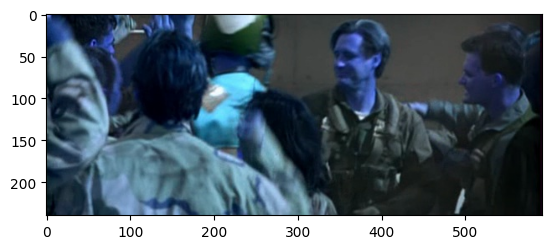

In [8]:
import cv2
import matplotlib.pyplot as plt

import glob
frame_folder = '/home/kuhaku/Code/FPT/VideoColorization/dataset/hollywood/frames'
img_paths = glob.glob(os.path.join(frame_folder, '*.jpg'))

('/home/kuhaku/Code/FPT/VideoColorization/dataset/train/test/lost_weekend_the_01681/gt',
 'frame001716.jpg')

In [40]:
test_path = '/home/kuhaku/Code/FPT/VideoColorization/dataset/train/test/*/gt/*.jpg'
for path in glob.glob(test_path):
    folder_name = path.split('/')[-3]
    os.makedirs(os.path.join('/home/kuhaku/Code/FPT/VideoColorization/dataset/train/test_', folder_name), exist_ok=True)
    shutil.copyfile(path, '/home/kuhaku/Code/FPT/VideoColorization/dataset/train/test_/' + folder_name + "/" + os.path.basename(path))

In [46]:
'/home/kuhaku/Code/FPT/VideoColorization/dataset/train/test_/' + folder_name + "/" + os.path.basename(path)

'/home/kuhaku/Code/FPT/VideoColorization/dataset/train/test_/double_indemnity_01977/frame000060.jpg'

In [43]:
'/home/kuhaku/Code/FPT/VideoColorization/dataset/train/test_/' + os.path.basename(path)

'/home/kuhaku/Code/FPT/VideoColorization/dataset/train/test_/frame000060.jpg'

In [44]:
path

'/home/kuhaku/Code/FPT/VideoColorization/dataset/train/test/double_indemnity_01977/gt/frame000060.jpg'